### 나이브 베이즈 분류를 활용한 댓글 분석과 예측

In [1]:
# 데이터 로드
article_df = pd.read_csv("./comment_data.csv")
len(article_df)

1922

In [2]:
# 결측치 존재, class 선별 과정에서 공백 생김
article_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1922 entries, 0 to 1921
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   _id         1144 non-null   object 
 1   title       1144 non-null   object 
 2   date        1144 non-null   object 
 3   youtube_id  1132 non-null   object 
 4   comment     1144 non-null   object 
 5   like_num    1144 non-null   object 
 6   class       1144 non-null   float64
dtypes: float64(1), object(6)
memory usage: 105.2+ KB


In [3]:
# 결측치 제거
article_df = article_df.dropna(axis=0, how='any')
article_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1132 entries, 0 to 1921
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   _id         1132 non-null   object 
 1   title       1132 non-null   object 
 2   date        1132 non-null   object 
 3   youtube_id  1132 non-null   object 
 4   comment     1132 non-null   object 
 5   like_num    1132 non-null   object 
 6   class       1132 non-null   float64
dtypes: float64(1), object(6)
memory usage: 70.8+ KB


In [4]:
# 중복제거1
test_data = list(set(article_df.comment))
len(test_data)

871

In [5]:
# 중복제거2, 감성 분석 라벨링 용
test_data_rm_du = article_df.drop_duplicates(['comment'])
len(test_data_rm_du)

871

In [6]:
# train, test 분리.
value_ =  np.random.rand(len(article_df)) < 0.9

train = article_df[value_]
test = article_df[~value_]

In [7]:
len(train), len(test)

(1024, 108)

In [8]:
train_data = list(train.comment)

In [9]:
# 데이터 전처리 : 데이터 셋 분리
X_train, X_test, y_train, y_test = train_test_split(
train.comment, train['class'], test_size=0.1, random_state=1)
len(X_train), len(X_test), len(y_train), len(y_test)

(921, 103, 921, 103)

In [11]:
# 모델 만들기
clf = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', MultinomialNB(alpha=0.1)),
])

In [12]:
# 학습
model = clf.fit(X_train.values.astype("str"), y_train)

In [13]:
# 모델 성능 확인
y_pred = model.predict(X_test)

In [14]:
list(y_test[:5]), list(y_pred[:5])

([3.0, 3.0, 2.0, 3.0, 2.0], [3.0, 3.0, 2.0, 2.0, 2.0])

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.57      0.65      0.61        26
         2.0       0.62      0.84      0.71        43
         3.0       0.73      0.32      0.45        34

    accuracy                           0.62       103
   macro avg       0.64      0.60      0.59       103
weighted avg       0.64      0.62      0.60       103



#### 모델 사용하기

In [16]:
categories = {
    1: "타다",
    2: "택시",
    3: "미분류",
}

In [17]:
# test_data 적용
datas = {
    "content": test_data,
    "category_code": model.predict(test_data),
}
df = pd.DataFrame(datas)
df

,content,category_code
0,언론을장학한 정부 법도없는정부 여론몰이 선수 나라를홀난하게하는 정부,3.0
1,타다 운전자들 니들도 범법자들이여 불법영업으로 재용이 돈벌어다 주었쓰니 공벙인디 ...,2.0
2,채이배국토부는너만못해\n상생안만들어서타다와협상\n했겠냐생각좀하고살아라,2.0
3,진짜 미친......저렇게 해도 미쳐버린 국민들이 뽑아준다...회의는 뭐하러해!!!...,1.0
4,법 테두리 안에 살자 우리.,2.0
...,...,...
866,표결없이 위원장 마음대로 법사위가 운영된다는게\n너무 어이상실이네요,1.0
867,타다는 불법 콜택시다!!!\n면허구입후 합법적으로해라!!!\n여상규 화이팅\n타다게...,2.0
868,정부잘못도 없진 않지 예전에 택시수요 생각도 안해보고 번호판 ㅈㄴ뿌린것도 한몫하지\...,3.0
869,프리랜서 아닌가,3.0


In [18]:
round(max(model.predict_proba([test_data[1]])[0]), 2)

0.96

In [19]:
df["category"] = df["category_code"].apply(lambda data: categories[data])
df["proba"] = df["content"].apply(
    lambda data: round(max(model.predict_proba([data])[0]), 2) )
df

,content,category_code,category,proba
0,언론을장학한 정부 법도없는정부 여론몰이 선수 나라를홀난하게하는 정부,3.0,미분류,0.59
1,타다 운전자들 니들도 범법자들이여 불법영업으로 재용이 돈벌어다 주었쓰니 공벙인디 ...,2.0,택시,0.96
2,채이배국토부는너만못해\n상생안만들어서타다와협상\n했겠냐생각좀하고살아라,2.0,택시,0.92
3,진짜 미친......저렇게 해도 미쳐버린 국민들이 뽑아준다...회의는 뭐하러해!!!...,1.0,타다,0.98
4,법 테두리 안에 살자 우리.,2.0,택시,0.97
...,...,...,...,...
866,표결없이 위원장 마음대로 법사위가 운영된다는게\n너무 어이상실이네요,1.0,타다,0.95
867,타다는 불법 콜택시다!!!\n면허구입후 합법적으로해라!!!\n여상규 화이팅\n타다게...,2.0,택시,0.93
868,정부잘못도 없진 않지 예전에 택시수요 생각도 안해보고 번호판 ㅈㄴ뿌린것도 한몫하지\...,3.0,미분류,0.97
869,프리랜서 아닌가,3.0,미분류,0.86


In [20]:
# 모델 저장
pickle.dump(model, open("clf.pkl", "wb"))

In [23]:
# 870번째 댓글 빼고는 모두 85% 이상의 확률로 예측함을 확인
df[df['proba'] > 0.85]

,content,category_code,category,proba
1,타다 운전자들 니들도 범법자들이여 불법영업으로 재용이 돈벌어다 주었쓰니 공벙인디 ...,2.0,택시,0.96
2,채이배국토부는너만못해\n상생안만들어서타다와협상\n했겠냐생각좀하고살아라,2.0,택시,0.92
3,진짜 미친......저렇게 해도 미쳐버린 국민들이 뽑아준다...회의는 뭐하러해!!!...,1.0,타다,0.98
4,법 테두리 안에 살자 우리.,2.0,택시,0.97
5,최소한 국민의 안전을 위해서라도 운송영업 면허가 있어야지. 어느나라가 무면허로 운송...,2.0,택시,0.99
...,...,...,...,...
865,입법문제인데 왜 행정권을 가진 대통령한테\n도움요청하냐? 국회에서 해결할 문제다,2.0,택시,0.93
866,표결없이 위원장 마음대로 법사위가 운영된다는게\n너무 어이상실이네요,1.0,타다,0.95
867,타다는 불법 콜택시다!!!\n면허구입후 합법적으로해라!!!\n여상규 화이팅\n타다게...,2.0,택시,0.93
868,정부잘못도 없진 않지 예전에 택시수요 생각도 안해보고 번호판 ㅈㄴ뿌린것도 한몫하지\...,3.0,미분류,0.97


In [ ]:
# 분류 결과 시각화

In [30]:
new_data = df['category'].value_counts()
final = pd.DataFrame(new_data)
final

,category
택시,392
타다,245
미분류,234


In [32]:
import chart_studio.plotly as py
import cufflinks as cf 
cf.go_offline(connected=True)

final.iplot(kind='bar')

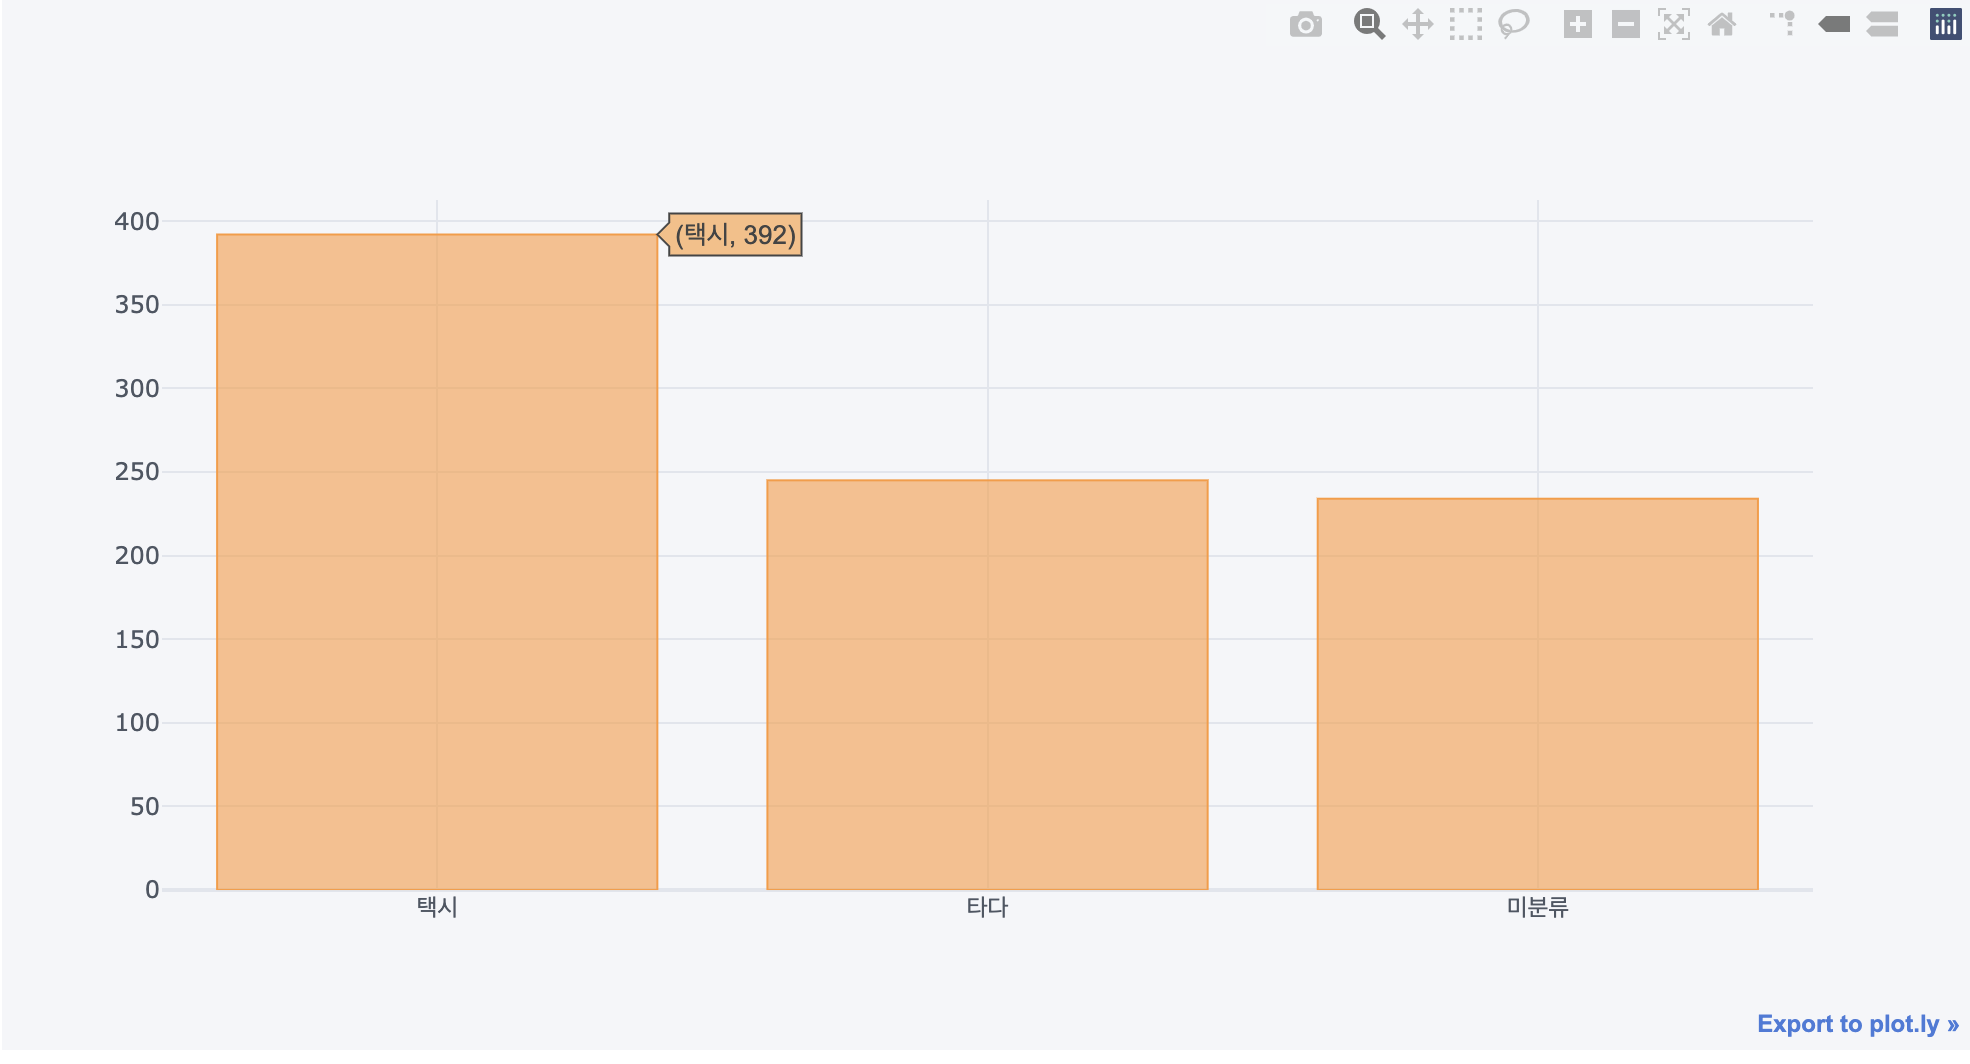

In [33]:
import PIL.Image as pilimg

confirmedcases = pilimg.open('./naive.png')
confirmedcases